In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [27]:
#importing the dataset
dataset= pd.read_csv('Position_Salaries.csv') # the full namespace of the file can be provided if the file is not in the same directory as the .ipynb or.py file
dataset.head()   # to see how the imported data looks like

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [29]:
dataset.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

In [30]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [31]:
dataset.head(4)

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000


Here, it can be seen that there are 3 columns in the dataset. The problem statement here is to predict the salary based on the Position and Level of the employee. But we may observe that the Position and the level are related or level is one other way of conveying the position of the employee in the company. So, essentially Position and Level are conveying the same kind of information. As Level is a numeric column, let's use that in our Machine Learning Model. Hence, Level is our feature or X variable. And, Salary is Label or the Y variable

# Visulaize dataset

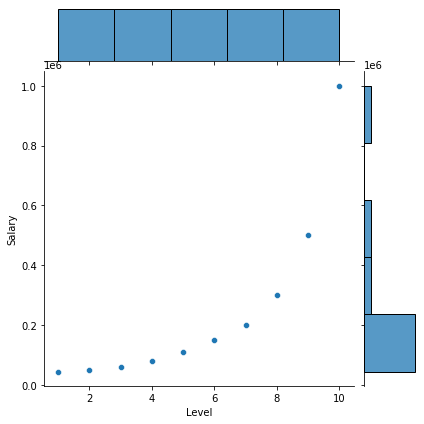

In [34]:
sns.jointplot(x='Level',y='Salary',data=dataset)

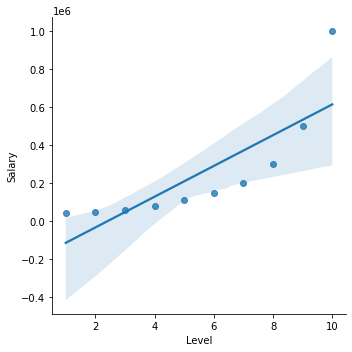

In [35]:
sns.lmplot(x='Level',y='Salary',data=dataset)

In [50]:
# x=dataset[['Salary']]
# y=dataset['Level']
x=dataset.iloc[:,1:2].values #gives you a 2-d dataframe (columns from 1 to 2),
#x=dataset.iloc[:,1].values
# this is written in this way to make x as a matrix as the machine learning algorithm.
# if we write 'x=dataset.iloc[:,1].values', it will return x as a single-dimensional array which is not desired 
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [49]:
y=dataset.iloc[:,2].values #gives you a pandas series (1-d) (from column 2).
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000], dtype=int64)

In [47]:
# Fitting Linear Regression to the dataset
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

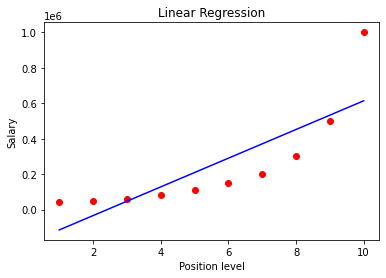

In [48]:
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg.predict(x), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Here, the red dots are the actual data points and, the blue straight line is what our model has created. It is evident from the diagram above that a Linear model does not fit our dataset well. So, let's try with a Polynomial Model

In [52]:
x.shape

(10, 1)

In [53]:
y.shape

(10,)

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=0)

In [57]:
x_train.shape

(8, 1)

In [59]:
print('Linear Model Coefficent (m)',regressor.coef_)
print('Linear Model Coefficent (b)',regressor.intercept_)

Linear Model Coefficent (m) [80878.78787879]
Linear Model Coefficent (b) -195333.33333333337


# Visulize the result

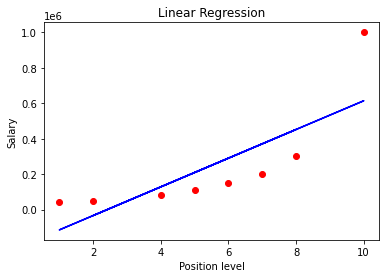

In [60]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_train, lin_reg.predict(x_train), color = 'blue')
plt.title('Linear Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [61]:
#This is the dolar(salary prediction)
y_predict=lin_reg.predict(x_test)
df_preds = pd.DataFrame({'Actual': y_test.squeeze(), 'Predicted': y_predict.squeeze()})
print(df_preds)

   Actual      Predicted
0   60000   47303.030303
1  500000  532575.757576


# Model Training

In [62]:
from sklearn.preprocessing import PolynomialFeatures

In [77]:
# Fitting Polynomial Regression to the dataset
poly_reg=PolynomialFeatures(degree=2) #trying to create a 2 degree polynomial equation. It simply squares the x as shown in the output
poly_reg
X_poly = poly_reg.fit_transform(x)
poly_reg.fit(X_poly, y)

PolynomialFeatures()

In [78]:
X_poly

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [79]:
le_reg2=LinearRegression()
le_reg2.fit(X_poly,y)

LinearRegression()

In [80]:
print('Model Coef',le_reg2.coef_)

Model Coef [      0.         -132871.21212121   19431.81818182]


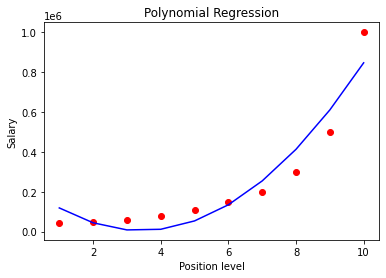

In [81]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, le_reg2.predict(poly_reg.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Still, a two degree equation is also not a good fit. Now, we'll try to increase the degree of the equation i.e. we'll try to see that whether we get a good fit at a higher degree or not. After some hit and trial, we see that the model get's the best fit for a 4th degree polynomial equation.

In [83]:
# Fitting Polynomial Regression to the dataset
poly_reg1=PolynomialFeatures(degree=4) #trying to create a 4 degree polynomial equation. X_poly = poly_reg.fit_transform(x)
X.poly1=poly_reg1.fit_transform(x)
poly_reg1.fit(X.poly1,y)
lin_reg_3 = LinearRegression()
lin_reg_3.fit(X.poly1, y)

LinearRegression()

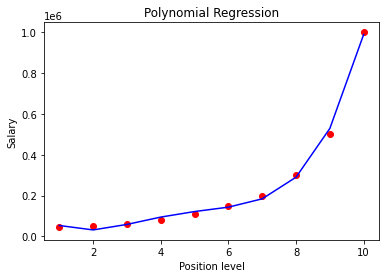

In [85]:
# Visualising the Polynomial Regression results
plt.scatter(x, y, color = 'red')
plt.plot(x, lin_reg_3.predict(poly_reg1.fit_transform(x)), color = 'blue')
plt.title('Polynomial Regression')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

Here, we can see that our model now accurately fits the dataset. This kind of a fit might not be the case with the actual business datasets. we are getting a brilliant fit as the number of datapoints are a few